In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from main import *

@nb.njit
def delta_x(positionX, others, boundaryLength, halfLength):
    subX = positionX - others
    adjustOthers = (
        others * (-halfLength <= subX) * (subX <= halfLength) + 
        (others - boundaryLength) * (subX < -halfLength) + 
        (others + boundaryLength) * (subX > halfLength)
    )
    adjustSubX = positionX - adjustOthers
    return adjustSubX

# 定义计算序参量的函数
def get_order_parameter(model: ObsAvoid, savePath: str = "./data", ):
    targetPath = f"{savePath}/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum
    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
    totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
    N = totalPhaseTheta.shape[1]
    orderParameter = (
        (np.sum(np.sin(totalPhaseTheta), axis=1) / N) ** 2 + 
        (np.sum(np.cos(totalPhaseTheta), axis=1) / N) ** 2
    )**0.5
    return orderParameter

# 计算空间聚集程度序参量的函数
def get_spatial_order_parameter(model: ObsAvoid, radius: float = 1.0, savePath: str = "./data"):
    targetPath = f"{savePath}/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum
    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
    totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
    ops = []
    for i in range(TNum):
        positionX = totalPositionX[i]
        N = totalPhaseTheta.shape[1]
        deltaX = delta_x(positionX, positionX[:, np.newaxis], model.boundaryLength, model.boundaryLength / 2)
        distance = np.sqrt(np.sum(deltaX ** 2, axis=-1))
        withinRadius = distance < radius
        ops.append(np.mean(np.sum(withinRadius, axis=1) / N))
    return np.array(ops)

In [6]:
# 在这里填入你的模型参数，确保之前已经在run.ipynb中运行过你的模型, 即已经保存了模型数据在./data文件夹下
model = ObsAvoid(strengthLambda=1, alpha=1, dt=0.005,
                 savePath="./data", tqdm=True, overWrite=True)

In [7]:
# 调用函数计算模型随时间的序参量变化
op = get_order_parameter(model)

In [8]:
# 查看序参量值
op

array([0.04312063, 0.35333867, 0.61409501, 0.94577284, 0.95864609,
       0.96032838, 0.95290047, 0.962578  , 0.96376811, 0.96895043,
       0.96777141, 0.96952176, 0.97921068, 0.97649475, 0.96779406,
       0.97526988, 0.97537594, 0.98080091, 0.96209109, 0.97629763,
       0.96623634, 0.9742997 , 0.97873977, 0.97153923, 0.96405645,
       0.96826456, 0.96903187, 0.97468577, 0.97378163, 0.96946254,
       0.97369613, 0.96626109, 0.97000197, 0.9717869 , 0.97282495,
       0.96832339, 0.97096242, 0.96238609, 0.96878799, 0.97282691,
       0.96816783, 0.96742766, 0.96901533, 0.96248858, 0.95315388,
       0.95216587, 0.9447169 , 0.95252233, 0.95571   , 0.95603202,
       0.94973511, 0.935924  , 0.94321629, 0.95446151, 0.94460016,
       0.94258634, 0.94333373, 0.94891349, 0.94923083, 0.93876176,
       0.95037489, 0.94892805, 0.94264945, 0.92953137, 0.94020014,
       0.94141327, 0.93920896, 0.93014129, 0.94445372, 0.93411931,
       0.93029083, 0.93161338, 0.93484757, 0.93251852, 0.92822

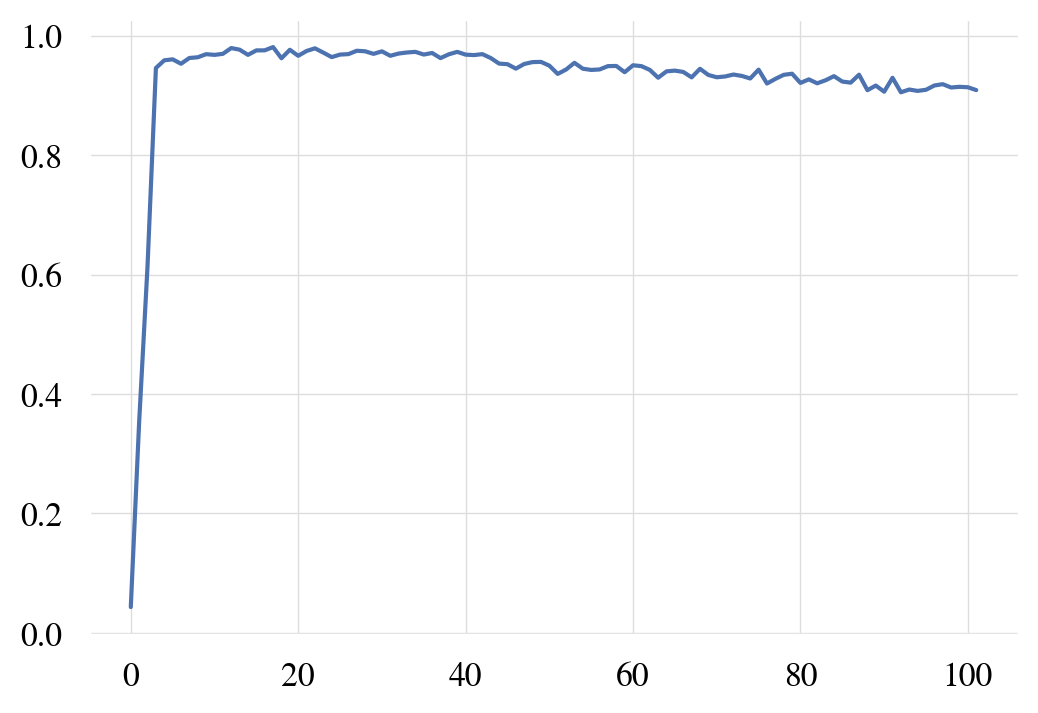

In [9]:
# 画出序参量随时间的变化
plt.figure(figsize=(6, 4))
plt.plot(op)

In [10]:
# 如果需要看终态的值，就看最后一个值
op[-1]

0.04422600000000001